<a name="topico4"></a>
# Bibliotecas


In [ ]:
# Instalar o CLIP a partir do reposit√≥rio oficial do OpenAI
!pip install git+https://github.com/openai/CLIP.git
!pip install torchmetrics

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-om17mjbh
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-om17mjbh
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 44.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 33.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
import torch
import torchvision
import pickle
import clip
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from sklearn.metrics import average_precision_score
from torchmetrics.retrieval import RetrievalMAP, RetrievalMRR, RetrievalPrecision, RetrievalRecall

<a name="topico4"></a>
# Extra√ß√£o e Explora√ß√£o do Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Caminho da pasta no Google Drive
project_folder = '/content/drive/MyDrive/FM30k/'

# Caminhos dos arquivos
tar_gz_path = f'{project_folder}flickr30k-images.tar.gz'
captions_path = f'{project_folder}captions.txt'


In [ ]:
# import tarfile
# import os

# # Extrair o arquivo .tar.gz
# with tarfile.open(tar_gz_path, 'r:gz') as tar:
#     tar.extractall(path=project_folder)

# # Verificar os arquivos extra√≠dos
# extracted_files = os.listdir(project_folder)
# print(f"Arquivos extra√≠dos: {project_folder[:5]}")  # Mostrar os primeiros 5 arquivos extra√≠dos


In [ ]:
# Ler o arquivo de captions
with open(captions_path, 'r') as f:
    captions = f.readlines()

# Mostrar as primeiras 5 captions
print(f"Primeiras captions: {captions[:5]}")

Primeiras captions: ['1000092795.jpg#1\tDois homens conversam no jardim perto do port√£o.\n', '1000092795.jpg#2\tDois jovens vestindo cal√ßas e camisetas encontram-se pr√≥ximos a um port√£o cercados por uma √°rea verde com muitas plantas e um gramado.\n', '1000092795.jpg#3\tDois homens vestindo cal√ßa e camisa de malha est√£o em p√© em frente a um port√£o que d√° acesso a um jardim.\n', '1000092795.jpg#4\tDois homens parados, em um ambiente aberto com folhagem verde, pr√≥ximos a um port√£o de metal e vidro.\n', '1000092795.jpg#5\tDois homens em frente a um port√£o cercado de plantas.\n']


In [ ]:
# # Caminho para a pasta com as imagens
# image_folder = os.path.join(project_folder, "flickr30k-images")

# # Listar apenas arquivos de imagem
# image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

# # Mostrar a primeira imagem
# if image_files:
#     image_path = os.path.join(image_folder, image_files[0])  # Caminho completo da primeira imagem
#     image = Image.open(image_path)  # Abrir a imagem com Pillow

#     # Exibir a imagem
#     plt.figure(figsize=(6, 6))  # Tamanho da figura
#     plt.imshow(image)
#     plt.axis("off")  # Remover eixos
#     plt.title(f"Primeira Imagem: {image_files[0]}")  # T√≠tulo com o nome do arquivo
#     plt.show()
# else:
#     print("Nenhuma imagem encontrada na pasta!")

<a name="topico4"></a>
# Organizando Imagens e legendas


In [ ]:
ja_feito_salvo_em_pickle = True

if not ja_feito_salvo_em_pickle:
  images_names = []

  # Ler as legendas do arquivo
  with open(captions_path, 'r') as f:
      for idx, line in enumerate(f.readlines()):  # Use o √≠ndice do loop para o √≠ndice das legendas
          line = line.strip()  # Remover espa√ßos em branco nas extremidades
          if not line:  # Ignorar linhas vazias
              continue

          # Verificar se a linha cont√©m duas tabula√ß√µes para separar a imagem e a legenda
          parts = line.split('\t')

          # Separar a linha em partes (imagem, √≠ndice da legenda e o texto da legenda)
          image_name_index, caption_text = parts[0], parts[1]
          image_name_index_ = image_name_index.split('#')
          # Extrair nome da imagem e o √≠ndice da legenda
          image_name, index = image_name_index_[0], image_name_index_[1]

          images_names.append(image_name)

          image_index = images_names.index(image_name)


  # Exemplo de sa√≠da para verifica√ß√£o
  images_names

In [ ]:
if not ja_feito_salvo_em_pickle:
  # Lista para armazenar os arquivos √∫nicos mantendo a ordem
  images_name_unique = []

  # Conjunto para verificar se o item j√° foi adicionado
  arquivos_vistos = set()

  # Iterando pelo vetor original
  for arquivo in images_names:
      if arquivo not in arquivos_vistos:
          images_name_unique.append(arquivo)
          arquivos_vistos.add(arquivo)

  path_name_vector = '/content/drive/MyDrive/FM30k/name_img_EN.pkl'

  with open(path_name_vector, 'wb') as file:
      pickle.dump(images_name_unique, file)

  print("Vetor salvo com sucesso usando pickle!")

In [ ]:
path_name_vector = '/content/drive/MyDrive/FM30k/name_img.pkl'
with open(path_name_vector, 'rb') as file:
    images_names = pickle.load(file)

print("Vetor images_names carregado com sucesso usando pickle!")
print(len(images_names))

Vetor images_names carregado com sucesso usando pickle!
31783


In [ ]:
if not ja_feito_salvo_em_pickle:
  image_captions = {}
  image_to_legend_indices = {}  # Dicion√°rio que mapeia √≠ndice da imagem para √≠ndices das legendas
  all_legendas = []
  images_names = images_names

  # Ler as legendas do arquivo
  with open(captions_path, 'r') as f:
      for idx, line in enumerate(f.readlines()):  # Use o √≠ndice do loop para o √≠ndice das legendas
          line = line.strip()  # Remover espa√ßos em branco nas extremidades
          if not line:  # Ignorar linhas vazias
              continue

          # Verificar se a linha cont√©m duas tabula√ß√µes para separar a imagem e a legenda
          parts = line.split('\t')

          # Separar a linha em partes (imagem, √≠ndice da legenda e o texto da legenda)
          image_name_index, caption_text = parts[0], parts[1]
          image_name_index_ = image_name_index.split('#')

          # Extrair nome da imagem e o √≠ndice da legenda
          image_name, index = image_name_index_[0], image_name_index_[1]
          index = int(index) - 1  # Ajusta para come√ßar de 0

          # Adicionar o nome da imagem e a legenda nas listas
          all_legendas.append(caption_text)

          # Organizar as legendas em um dicion√°rio, onde a chave √© o nome da imagem
          if image_name not in image_captions:
              image_captions[image_name] = {}
          image_captions[image_name][index] = caption_text

          # Encontre o √≠ndice da imagem na lista `images_names` carregada anteriormente
          image_index = images_names.index(image_name)

          # Se o √≠ndice da imagem ainda n√£o estiver no dicion√°rio `image_to_legend_indices`, adicione uma lista vazia
          if image_index not in image_to_legend_indices:
              image_to_legend_indices[image_index] = []

          # Adicionar o √≠ndice da legenda (usando o √≠ndice do loop) √† lista correspondente √† imagem
          image_to_legend_indices[image_index].append(idx)

  # Exemplo de sa√≠da para verifica√ß√£o
  print(image_to_legend_indices)

  path_image_to_legend_indices = '/content/drive/MyDrive/FM30k/image_to_legend_indices_EN.pkl'
  with open(path_image_to_legend_indices, 'wb') as file:
        pickle.dump(image_to_legend_indices, file)

  path_all_legendas = '/content/drive/MyDrive/FM30k/all_legendas_en_to_pt_full.pkl'
  with open(path_all_legendas, 'wb') as file:
        pickle.dump(all_legendas, file)

In [ ]:
path_image_to_legend_indices = '/content/drive/MyDrive/FM30k/image_to_legend_indices_EN.pkl'
with open(path_image_to_legend_indices, 'rb') as file:
    image_to_legend_indices = pickle.load(file)

print("Dicion√°rio image_to_legend_indices carregado com sucesso usando pickle!")
print(len(image_to_legend_indices))

Dicion√°rio image_to_legend_indices carregado com sucesso usando pickle!
31783


In [ ]:
path_all_legendas = '/content/drive/MyDrive/FM30k/all_legendas_en_to_pt_full.pkl'
with open(path_all_legendas, 'rb') as file:
    all_legendas = pickle.load(file)

print("Vetor all_legendas carregado com sucesso usando pickle!")
print(len(all_legendas))

Vetor all_legendas carregado com sucesso usando pickle!
158914


<a name="topico4"></a>
# Subset Para Rodar Local

In [ ]:
num_imagens = 20

In [ ]:
images_names = images_names[:num_imagens]

In [ ]:
image_to_legend_indices = dict(list(image_to_legend_indices.items())[:num_imagens])

In [ ]:
all_legendas = all_legendas[:image_to_legend_indices[num_imagens-1][-1]+1]

In [ ]:
all_legendas

['Two young guys with shaggy hair look at their hands while hanging out in the yard .',
 'Two young , White males are outside near many bushes .',
 'Two men in green shirts are standing in a yard .',
 'A man in a blue shirt standing in a garden .',
 'Two friends enjoy time spent together .',
 'Several men in hard hats are operating a giant pulley system .',
 'Workers look down from up above on a piece of equipment .',
 'Two men working on a machine wearing hard hats .',
 'Four men on top of a tall structure .',
 'Three men on a large rig .',
 'A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A little girl in a pink dress going into a wooden cabin .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl climbing into a wooden playhouse',
 'A girl going into a wooden building .',
 'Someone in a blue shirt and hat is standing on stair and leaning against a window .',
 'A man in a blue shirt is standing on a ladder cleaning a window .',
 'A m

In [ ]:
path_all_legendas = '/content/drive/MyDrive/FM30k/all_legendas_EN_100.pkl'
with open(path_all_legendas, 'wb') as file:
      pickle.dump(all_legendas, file)

<a name="topico4"></a>
# Divis√£o Dataset

In [ ]:
def generate_folds_pairs(image_indices, num_folds=5, seed=42):
    """
    Gera folds de valida√ß√£o cruzada com embaralhamento controlado.
    Retorna uma lista de pares (train_indices, val_indices) como no KFold.

    Par√¢metros:
    - image_indices (list): Lista de nomes das imagens
    - num_folds (int): N√∫mero de folds (default: 5)
    - seed (int): Seed para embaralhamento reprodut√≠vel

    Retorna:
    - folds (list): Lista com tuplas (train_indices, val_indices)
    """
    # Gerar e embaralhar os √≠ndices
    image_indices = np.arange(len(image_indices))
    rng = np.random.default_rng(seed)
    rng.shuffle(image_indices)

    # Dividir em folds
    folds_split = np.array_split(image_indices, num_folds)

    # Criar lista de pares (train, val)
    folds = []
    for i in range(num_folds):
        val_indices = folds_split[i]
        train_indices = np.concatenate([folds_split[j] for j in range(num_folds) if j != i])
        folds.append((train_indices.tolist(), val_indices.tolist()))

    return folds



In [ ]:
num_folds = 5
seed = 42
np.random.seed(seed)

image_indices = np.arange(len(images_names))  # Lista [0, 1, 2, ..., 30999]
# Embaralhar os √≠ndices para garantir aleatoriedade
np.random.shuffle(image_indices)
image_indices

folds = generate_folds_pairs(image_indices, num_folds=num_folds, seed=seed)

fold_id = 0
train_indices, val_indices = folds[fold_id]

# Obter imagens correspondentes
train_images = [images_names[i] for i in train_indices]
val_images = [images_names[i] for i in val_indices]

# Obter as legendas correspondentes
train_legends = [all_legendas[idx] for i in train_indices for idx in image_to_legend_indices[i]]
val_legends = [all_legendas[idx] for i in val_indices for idx in image_to_legend_indices[i]]

<a name="topico4"></a>
# Finetuning

In [ ]:
base_finetuning = "ViT-B/32"
nome_salvar = f"{base_finetuning.replace('/', '-')}_seed{seed}_{fold_id}"

nome_salvar

'ViT-B-32_seed42_0'

<a name="topico4"></a>
### Carregando o CLIP e congelando o encoder visual

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load(base_finetuning, device=device)

# Congelar a parte visual
for param in model.visual.parameters():
    param.requires_grad = False

# Otimizador s√≥ para a parte textual
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-5)

loss_fn = torch.nn.CrossEntropyLoss()


<a name="topico4"></a>
### Montando dataset

In [ ]:
train_image_paths = []

for i in train_indices:
    image_path = images_names[i]
    legend_indices = image_to_legend_indices[i]
    for _ in legend_indices:
        train_image_paths.append(image_path)


In [ ]:
class CLIPDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, legends, preprocess, image_dir):
        self.image_paths = image_paths
        self.legends = legends
        self.preprocess = preprocess
        self.image_dir = image_dir

    def __len__(self):
        return len(self.legends)

    def __getitem__(self, idx):
        image_filename = self.image_paths[idx]
        image_path = os.path.join(self.image_dir, image_filename)
        image = self.preprocess(Image.open(image_path).convert("RGB"))
        text = clip.tokenize([self.legends[idx]], truncate=True)[0].long()
        # text = self.legends[idx]
        return image, text



In [ ]:
image_folder = '/content/drive/MyDrive/FM30k/flickr30k-images'
train_dataset = CLIPDataset(train_image_paths, train_legends, preprocess, image_folder)

<a name="topico4"></a>
### Ver uma amostra aleat√≥ria do dataset

Exemplo 3920
Legenda: tensor([49406,  1008,  2143,   332,   654,  1004,  6536, 11656,   920, 34104,
         1140,  2291, 22229,  2270,  1008,   699,  2319,   269, 49407,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0])


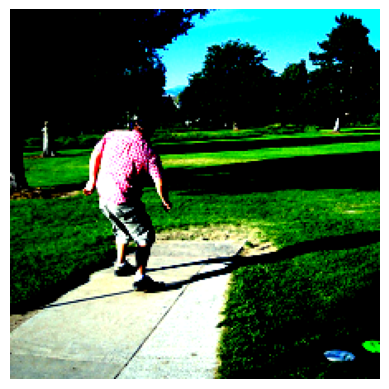

In [ ]:
idx = random.randint(0, len(train_dataset) - 1)
img, txt = train_dataset[idx]

print(f"Exemplo {idx}")
print("Legenda:", txt)
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')
plt.show()



<a name="topico4"></a>
### DataLoader

In [ ]:

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


<a name="topico4"></a>
### Loop de Treinamento

In [ ]:
from tqdm import tqdm

model.train()
model = model.float()
torch.autograd.set_detect_anomaly(True)

epochs = 3
eps = 1e-8

for epoch in range(epochs):
    total_loss = 0

    # Barra de progresso para a √©poca
    pbar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}/{epochs}")

    for batch_idx, (images, texts) in pbar:
        images = images.to(device).float()
        texts = texts.to(device)

        optimizer.zero_grad()

        image_features = model.encode_image(images)
        text_features = model.encode_text(texts)

        image_features = image_features / (image_features.norm(dim=-1, keepdim=True) + eps)
        text_features = text_features / (text_features.norm(dim=-1, keepdim=True) + eps)

        logits_per_image = image_features @ text_features.t()
        logits_per_text = text_features @ image_features.t()

        # ### VISUALIZAR HEATMAP DOS LOGITS
        # logits_np = logits_per_image.detach().cpu().numpy()
        # plt.figure(figsize=(10, 8))
        # sns.heatmap(logits_np, annot=False, cmap="viridis")
        # plt.title("üîç Heatmap dos Logits (Imagem ‚Üí Texto)")
        # plt.xlabel("Legenda no batch")
        # plt.ylabel("Imagem no batch")
        # plt.show()

        # logits_np_text = logits_per_text.detach().cpu().numpy()
        # plt.figure(figsize=(10, 8))
        # sns.heatmap(logits_np_text, annot=False, cmap="magma")
        # plt.title("üîç Heatmap dos Logits (Texto ‚Üí Imagem)")
        # plt.xlabel("Imagem no batch")
        # plt.ylabel("Legenda no batch")
        # plt.show()
        # ### VISUALIZAR HEATMAP DOS LOGITS

        labels = torch.arange(len(images), device=device)

        loss_img = loss_fn(logits_per_image, labels)
        loss_txt = loss_fn(logits_per_text, labels)
        loss = (loss_img + loss_txt) / 2

        # Verifica NaN ou Inf
        if torch.isnan(loss) or torch.isinf(loss):
            print("‚ùå Detected NaN ou Inf na loss!")
            print("Loss img:", loss_img.item(), "Loss txt:", loss_txt.item())
            break

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # üìã Logs de diagn√≥stico formatados
        diag_log = (
            f"Loss: {loss.item():.4f} | "
            f"I_feat Œº: {image_features.mean():.4f}, œÉ: {image_features.std():.4f} | "
            f"T_feat Œº: {text_features.mean():.4f}, œÉ: {text_features.std():.4f} | "
            f"Logits I‚ÜíT: {logits_per_image.min():.2f}/{logits_per_image.max():.2f}"
        )

        # Atualiza a barra com info
        pbar.set_postfix_str(diag_log)

        # (Opcional) Salvar log em arquivo
        # with open("training_logs.txt", "a") as f:
        #     f.write(f"[Epoch {epoch+1} | Batch {batch_idx}] {diag_log}\n")

    print(f"\n ‚úÖ Epoch {epoch+1}/{epochs} - Loss total: {total_loss:.4f}")


Epoch 1/3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 125/125 [01:33<00:00,  1.33it/s, Loss: 3.1645 | I_feat Œº: -0.0012, œÉ: 0.0442 | T_feat Œº: -0.0006, œÉ: 0.0442 | Logits I‚ÜíT: -0.23/0.50]



 ‚úÖ Epoch 1/3 - Loss total: 403.3358


Epoch 2/3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 125/125 [01:34<00:00,  1.32it/s, Loss: 3.1107 | I_feat Œº: -0.0008, œÉ: 0.0442 | T_feat Œº: -0.0005, œÉ: 0.0442 | Logits I‚ÜíT: -0.21/0.51]



 ‚úÖ Epoch 2/3 - Loss total: 391.3862


Epoch 3/3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 125/125 [01:33<00:00,  1.34it/s, Loss: 3.0783 | I_feat Œº: -0.0013, œÉ: 0.0442 | T_feat Œº: -0.0002, œÉ: 0.0442 | Logits I‚ÜíT: -0.22/0.54]


 ‚úÖ Epoch 3/3 - Loss total: 386.3576


In [ ]:
finetuning_folder = '/content/drive/MyDrive/FM30k/Finetuning'
finetuning_filename = f"clip_finetuned_{nome_salvar}.pth"
finetuning_path = os.path.join(finetuning_folder, finetuning_filename)

# Salvar os pesos do modelo fine-tunado
torch.save(model.state_dict(), finetuning_path)
print(f"‚úÖ Modelo {finetuning_filename} salvo em {finetuning_path}")

‚úÖ Modelo clip_finetuned_ViT-B-32_seed42_0.pth salvo em /content/drive/MyDrive/FM30k/Finetuning/clip_finetuned_ViT-B-32_seed42_0.pth


<a name="topico4"></a>
# Embeddings para Valida√ß√£o

<a name="topico4"></a>
### Carregando o CLIP com fine-tuning

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load(base_finetuning, device=device)

# Carregar os pesos fine-tunados
finetuning_folder = '/content/drive/MyDrive/FM30k/Finetuning'
finetuning_filename = f"clip_finetuned_{nome_salvar}.pth"
finetuning_path = os.path.join(finetuning_folder, finetuning_filename)

model.load_state_dict(torch.load(finetuning_path, map_location=device))
model.eval()  # Modo avalia√ß√£o (desliga dropout, batchnorm, etc.)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 338M/338M [00:02<00:00, 128MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

Verificando se apenas a parte textual foi treinada

In [ ]:
# device = "cuda" if torch.cuda.is_available() else "cpu"

# # Carregar o modelo original (antes de carregar os pesos fine-tunados)
# model_original, _ = clip.load(base_finetuning, device=device)

# # Carregar os pesos fine-tunados
# finetuning_folder = '/content/drive/MyDrive/FM30k/Finetuning'
# finetuning_filename = f"clip_finetuned_{nome_salvar}.pth"
# finetuning_path = os.path.join(finetuning_folder, finetuning_filename)

# # Carregar o estado dos pesos fine-tunados no modelo
# state_dict = torch.load(finetuning_path, map_location=device)

# # Carregar os pesos fine-tunados no modelo
# model.load_state_dict(state_dict, strict=False)

# # Comparar todos os par√¢metros
# for name, param in model.named_parameters():
#     original_param = model_original.state_dict().get(name)

#     # Se o par√¢metro original existe no modelo, compara os valores
#     if original_param is not None:
#         finetuned_param = param.data

#         # Se os par√¢metros forem diferentes, imprime o nome
#         if not torch.equal(original_param, finetuned_param):
#             print(f"Par√¢metro modificado: {name}")
#         else:
#             print(f"Par√¢metro igual: {name}")


<a name="topico4"></a>
### Carregando o CLIP original

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_original, preprocess_original = clip.load(base_finetuning, device=device)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 338M/338M [00:06<00:00, 57.5MiB/s]


<a name="topico4"></a>
### Dataset e Dataloader para a valida√ß√£o

In [ ]:
class ImageOnlyDataset(Dataset):
    def __init__(self, image_paths, preprocess, image_dir):
        self.image_paths = image_paths  # Lista com nomes dos arquivos .jpg
        self.preprocess = preprocess
        self.image_dir = image_dir

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_paths[idx])
        image = Image.open(image_path).convert("RGB")
        return self.preprocess(image)


In [ ]:
class TextOnlyDataset(Dataset):
    def __init__(self, legends, tokenizer):
        self.legends = legends
        self.tokenizer = tokenizer  # clip.tokenize

    def __len__(self):
        return len(self.legends)

    def __getitem__(self, idx):
        tokens = self.tokenizer([self.legends[idx]], truncate=True)
        return tokens[0]

Finetuning

In [ ]:
image_folder = '/content/drive/MyDrive/FM30k/flickr30k-images'

image_dataset = ImageOnlyDataset(val_images, preprocess, image_folder)
image_loader = DataLoader(image_dataset, batch_size=32, shuffle=False)

text_dataset = TextOnlyDataset(val_legends, tokenizer=clip.tokenize)
text_loader = DataLoader(text_dataset, batch_size=32, shuffle=False)

Original

In [ ]:
image_folder = '/content/drive/MyDrive/FM30k/flickr30k-images'

image_dataset_original = ImageOnlyDataset(val_images, preprocess_original, image_folder)
image_loader_original = DataLoader(image_dataset_original, batch_size=32, shuffle=False)

text_dataset_original = TextOnlyDataset(val_legends, tokenizer=clip.tokenize)
text_loader_original = DataLoader(text_dataset_original, batch_size=32, shuffle=False)

<a name="topico4"></a>
### Gera√ß√£o dos Embeddings

In [ ]:
def generate_embeddings(model, dataloader, tipo='image'):
    model.eval()
    all_embeddings = []

    with torch.no_grad():
        for batch in tqdm(dataloader):
            batch = batch.to(device)
            if tipo == 'image':
                features = model.encode_image(batch)
            else:
                features = model.encode_text(batch)

            features /= features.norm(dim=-1, keepdim=True)
            all_embeddings.append(features.cpu())

    return torch.cat(all_embeddings)

Finetuning

In [ ]:
image_embeddings = generate_embeddings(model, image_loader, tipo='image')
text_embeddings = generate_embeddings(model, text_loader, tipo='text')

save_path = '/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine'
# Salvar no disco
torch.save(image_embeddings, os.path.join(save_path, f'image_embeddings_val_{nome_salvar}.pt'))
torch.save(text_embeddings, os.path.join(save_path, f'text_embeddings_val_{nome_salvar}.pt'))

  1%|          | 2/199 [02:27<3:33:38, 65.07s/it] 

Original

In [ ]:
image_embeddings_original = generate_embeddings(model_original, image_loader_original, tipo='image')
text_embeddings_original = generate_embeddings(model_original, text_loader_original, tipo='text')

save_path = '/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original'
# Salvar no disco
torch.save(image_embeddings_original, os.path.join(save_path, f'image_embeddings_EN_val.pt'))
torch.save(text_embeddings_original, os.path.join(save_path, f'text_embeddings_EN.pt'))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 94/94 [00:02<00:00, 37.16it/s]


RuntimeError: Parent directory /content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/image_embeddings_ViT-B does not exist.

<a name="topico4"></a>
# Valida√ß√£o

In [ ]:
val_legend_indices = []
for idx in val_indices:
    val_legend_indices.extend(image_to_legend_indices[idx])

len(val_legend_indices)

158915

<a name="topico4"></a>
## Autom√°tica

In [ ]:
def evaluate_retrieval(
    query_embeddings,
    candidate_embeddings,
    ground_truth_mapping,
    query_indices,
    k=5,
    batch_size=256,
    device=None,
    mode="im2text"  # ou "text2im"
):
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"
    device = torch.device(device)

    print(f"üì° Usando device: {device}")

    query_embeddings = query_embeddings.to(device)
    candidate_embeddings = candidate_embeddings.to(device)

    total_queries = len(query_indices)

    y_true_all = []
    y_score_all = []
    indexes_all = []   # NOVO

    for batch_start in range(0, total_queries, batch_size):
        batch = query_embeddings[batch_start: batch_start + batch_size]

        similarity = batch @ candidate_embeddings.T

        batch_size_real = similarity.size(0)

        for j in range(batch_size_real):
            query_idx_global = query_indices[batch_start + j]

            if mode == "im2text":
                ground_truth_set = set(ground_truth_mapping[query_idx_global])
                for idx_candidato in range(similarity.size(1)):
                    is_relevant = 1 if idx_candidato in ground_truth_set else 0
                    y_true_all.append(is_relevant)
                    y_score_all.append(similarity[j, idx_candidato].item())
                    indexes_all.append(batch_start + j)  # importante!

            elif mode == "text2im":
                imagem_idx_gt = None
                for imagem_idx, legendas_idx_list in ground_truth_mapping.items():
                    if query_idx_global in legendas_idx_list:
                        imagem_idx_gt = imagem_idx
                        break
                if imagem_idx_gt is None:
                    continue
                for idx_candidato in range(similarity.size(1)):
                    is_relevant = 1 if idx_candidato == imagem_idx_gt else 0
                    y_true_all.append(is_relevant)
                    y_score_all.append(similarity[j, idx_candidato].item())
                    indexes_all.append(batch_start + j)  # importante!

            else:
                raise ValueError(f"Modo inv√°lido: {mode}. Use 'im2text' ou 'text2im'.")

    y_true_tensor = torch.tensor(y_true_all, dtype=torch.int, device=device)
    y_score_tensor = torch.tensor(y_score_all, dtype=torch.float, device=device)
    indexes_tensor = torch.tensor(indexes_all, dtype=torch.long, device=device)  # NOVO

    # === M√©tricas autom√°ticas ===
    map_sklearn = average_precision_score(y_true_tensor.cpu(), y_score_tensor.cpu())

    map_metric = RetrievalMAP()
    mrr_metric = RetrievalMRR()
    precision_metric = RetrievalPrecision(top_k=k)
    recall_metric = RetrievalRecall(top_k=k)

    # üõ†Ô∏è Aqui o ajuste: passar o indexes_tensor
    map_value = map_metric(y_score_tensor, y_true_tensor, indexes=indexes_tensor).item()
    mrr_value = mrr_metric(y_score_tensor, y_true_tensor, indexes=indexes_tensor).item()
    precision_at_k_value = precision_metric(y_score_tensor, y_true_tensor, indexes=indexes_tensor).item()
    recall_at_k_value = recall_metric(y_score_tensor, y_true_tensor, indexes=indexes_tensor).item()

    if precision_at_k_value + recall_at_k_value > 0:
        f1_at_k_value = (2 * precision_at_k_value * recall_at_k_value) / (precision_at_k_value + recall_at_k_value)
    else:
        f1_at_k_value = 0.0

    print(f"‚úÖ mAP (sklearn): {map_sklearn:.4f}")
    print(f"‚úÖ mAP (torchmetrics): {map_value:.4f}")
    print(f"‚úÖ MRR: {mrr_value:.4f}")
    print(f"‚úÖ Precision@{k}: {precision_at_k_value:.4f}")
    print(f"‚úÖ Recall@{k}: {recall_at_k_value:.4f}")
    print(f"‚úÖ F1-Score@{k}: {f1_at_k_value:.4f}")

    return {
        "map_sklearn": map_sklearn,
        "map_torchmetrics": map_value,
        "mrr": mrr_value,
        "precision@k": precision_at_k_value,
        "recall@k": recall_at_k_value,
        "f1@k": f1_at_k_value,
    }


In [ ]:
image_embeddings = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine/image_embeddings_val.pt')
text_embeddings = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine/text_embeddings_val.pt')

In [ ]:
image_embeddings_original = torch.load(f'/content/drive/MyDrive/FM30k/Embeddings_EN/image_embeddings_full.pt')
text_embeddings_original = torch.load(f'/content/drive/MyDrive/FM30k/Embeddings_EN/text_embeddings_full.pt')

In [ ]:
image_embeddings_EN = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/image_embeddings_EN_val.pt')
text_embeddings_EN = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/text_embeddings_EN.pt')

In [ ]:
results = evaluate_retrieval(
    query_embeddings=image_embeddings_EN,
    candidate_embeddings=text_embeddings_EN,
    ground_truth_mapping=image_to_legend_indices,
    query_indices=val_indices,
    mode="im2text"
)

üì° Usando device: cuda
‚úÖ mAP (sklearn): 0.0004
‚úÖ mAP (torchmetrics): 0.0008
‚úÖ MRR: 0.0009
‚úÖ Precision@5: 0.0000
‚úÖ Recall@5: 0.0000
‚úÖ F1-Score@5: 0.0000


In [ ]:
results = evaluate_retrieval(
    query_embeddings=text_embeddings_EN,
    candidate_embeddings=image_embeddings_EN,
    ground_truth_mapping=image_to_legend_indices,
    query_indices=val_legend_indices,
    mode="text2im"
)


üì° Usando device: cuda
‚úÖ mAP (sklearn): 0.0003
‚úÖ mAP (torchmetrics): 0.0022
‚úÖ MRR: 0.0022
‚úÖ Precision@5: 0.0001
‚úÖ Recall@5: 0.0007
‚úÖ F1-Score@5: 0.0002


In [ ]:
results = evaluate_retrieval(
    query_embeddings=text_embeddings_original,
    candidate_embeddings=image_embeddings_original,
    ground_truth_mapping=image_to_legend_indices,
    query_indices=val_legend_indices,
    mode="text2im"
)

<a name="topico4"></a>
## Manual

In [ ]:
def evaluate_fold_image_to_text(
    val_indices,
    image_embeddings_val,
    text_embeddings_val,
    all_legendas,
    image_to_legend_indices,
    val_legend_indices,
    k=5,
    batch_size=256
                  ):
    total_images = len(val_indices)

    correct_count = 0
    average_precisions = []
    precision_at_k_sum = 0.0
    recall_at_k_sum = 0.0
    reciprocal_ranks = []

    for batch_start in range(0, total_images, batch_size):
        batch = image_embeddings_val[batch_start: batch_start + batch_size]

        # Similaridade entre batch de imagens e todas as legendas de valida√ß√£o
        similarity = batch @ text_embeddings_val.T
        topk_indices = torch.topk(similarity, k=k, dim=1).indices.cpu().tolist()

        for j, indices in enumerate(topk_indices):
            image_idx = val_indices[batch_start + j]  # √≠ndice original da imagem
            ground_truth = set(image_to_legend_indices[image_idx])

            # M√©tricas
            # indices s√£o os indices locais, 0 do text_embeddings pode ser a legenda global 250
            # (val_legend_indices mapeia os √≠ndices locais para globais)
            if any(val_legend_indices[idx] in ground_truth for idx in indices):
                correct_count += 1

            relevant_count = 0
            precision_sum = 0.0
            for rank, idx in enumerate(indices):
                legend_idx_global = val_legend_indices[idx]
                if legend_idx_global in ground_truth:
                    relevant_count += 1
                    precision_sum += relevant_count / (rank + 1)

            average_precision = precision_sum / min(len(ground_truth), k) if ground_truth else 0
            average_precisions.append(average_precision)

            precision_at_k = sum(1 for idx in indices if val_legend_indices[idx] in ground_truth) / k
            precision_at_k_sum += precision_at_k

            recall_at_k = sum(1 for idx in indices if val_legend_indices[idx] in ground_truth) / len(ground_truth)
            recall_at_k_sum += recall_at_k

            reciprocal_rank = 0.0
            for rank, idx in enumerate(indices):
                if val_legend_indices[idx] in ground_truth:
                    reciprocal_rank = 1.0 / (rank + 1)
                    break
            reciprocal_ranks.append(reciprocal_rank)

    # Resultados finais
    top5_accuracy = correct_count / total_images
    mean_average_precision = sum(average_precisions) / total_images
    precision_at_k = precision_at_k_sum / total_images
    recall_at_k = recall_at_k_sum / total_images
    mean_reciprocal_rank = sum(reciprocal_ranks) / total_images
    f1_score_at_k = (2 * precision_at_k * recall_at_k) / (precision_at_k + recall_at_k) if (precision_at_k + recall_at_k) > 0 else 0.0

    print(f"(Imagem ‚ûî Texto)")
    print(f"‚úÖ Top-5 Accuracy: {top5_accuracy:.4f}")
    print(f"‚úÖ mAP: {mean_average_precision:.4f}")
    print(f"‚úÖ Precision@{k}: {precision_at_k:.4f}")
    print(f"‚úÖ Recall@{k}: {recall_at_k:.4f}")
    print(f"‚úÖ MRR: {mean_reciprocal_rank:.4f}")
    print(f"‚úÖ F1-Score@{k}: {f1_score_at_k:.4f}")

    return {
        "top5_accuracy": top5_accuracy,
        "map": mean_average_precision,
        "precision@k": precision_at_k,
        "recall@k": recall_at_k,
        "mrr": mean_reciprocal_rank,
        "f1@k": f1_score_at_k,
    }


In [ ]:
def evaluate_fold_text_to_image(
    val_image_indices,
    image_embeddings_val,
    text_embeddings_val,
    image_to_legend_indices,
    val_legend_indices,
    k=5,
    batch_size=256
):
    total_legendas = len(val_legend_indices)

    # Construir dicion√°rio: legenda -> imagem
    legend_to_image = {}
    for image_idx, legend_indices in image_to_legend_indices.items():
        for legend_idx in legend_indices:
            legend_to_image[legend_idx] = image_idx

    correct_count = 0
    average_precisions = []
    precision_at_k_sum = 0.0
    recall_at_k_sum = 0.0
    reciprocal_ranks = []

    for batch_start in range(0, total_legendas, batch_size):
        batch = text_embeddings_val[batch_start: batch_start + batch_size]

        # Similaridade entre batch de legendas e todas as imagens
        similarity = batch @ image_embeddings_val.T
        topk_indices = torch.topk(similarity, k=k, dim=1).indices.cpu().tolist()

        for j, indices in enumerate(topk_indices):
            legend_idx_global = val_legend_indices[batch_start + j]

            # Pega a imagem correspondente a esta legenda
            ground_truth_image_idx = legend_to_image.get(legend_idx_global, None)
            if ground_truth_image_idx is None:
                continue  # Caso improv√°vel: legenda sem imagem associada

            retrieved_images = [val_image_indices[idx] for idx in indices]

            # M√©tricas
            if ground_truth_image_idx in retrieved_images:
                correct_count += 1

            relevant_count = 0
            precision_sum = 0.0
            for rank, idx in enumerate(indices):
                image_idx_global = val_image_indices[idx]
                if image_idx_global == ground_truth_image_idx:
                    relevant_count += 1
                    precision_sum += relevant_count / (rank + 1)

            average_precision = precision_sum / min(1, k)  # S√≥ uma imagem correta
            average_precisions.append(average_precision)

            precision_at_k = sum(1 for idx in indices if val_image_indices[idx] == ground_truth_image_idx) / k
            precision_at_k_sum += precision_at_k

            recall_at_k = sum(1 for idx in indices if val_image_indices[idx] == ground_truth_image_idx) / 1  # apenas 1 relevante
            recall_at_k_sum += recall_at_k

            reciprocal_rank = 0.0
            for rank, idx in enumerate(indices):
                if val_image_indices[idx] == ground_truth_image_idx:
                    reciprocal_rank = 1.0 / (rank + 1)
                    break
            reciprocal_ranks.append(reciprocal_rank)

    # Resultados finais
    topk_accuracy = correct_count / total_legendas
    mean_average_precision = sum(average_precisions) / total_legendas
    precision_at_k = precision_at_k_sum / total_legendas
    recall_at_k = recall_at_k_sum / total_legendas
    mean_reciprocal_rank = sum(reciprocal_ranks) / total_legendas
    f1_score_at_k = (2 * precision_at_k * recall_at_k) / (precision_at_k + recall_at_k) if (precision_at_k + recall_at_k) > 0 else 0.0

    print(f"(Texto ‚ûî Imagem)")
    print(f"‚úÖ Top-{k} Accuracy: {topk_accuracy:.4f}")
    print(f"‚úÖ mAP: {mean_average_precision:.4f}")
    print(f"‚úÖ Precision@{k}: {precision_at_k:.4f}")
    print(f"‚úÖ Recall@{k}: {recall_at_k:.4f}")
    print(f"‚úÖ MRR: {mean_reciprocal_rank:.4f}")
    print(f"‚úÖ F1-Score@{k}: {f1_score_at_k:.4f}")

    return {
        f"top{k}_accuracy": topk_accuracy,
        "map": mean_average_precision,
        f"precision@{k}": precision_at_k,
        f"recall@{k}": recall_at_k,
        "mrr": mean_reciprocal_rank,
        f"f1@{k}": f1_score_at_k,
    }

In [ ]:
nome = 'ViT-B-32_seed42_0'
# image_embeddings = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine/image_embeddings_val_{nome}.pt')
# text_embeddings = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine/text_embeddings_val_{nome}.pt')

image_embeddings = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine/image_embeddings_val.pt')
text_embeddings = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine/text_embeddings_val.pt')
metricas_img = evaluate_fold_image_to_text(val_indices, image_embeddings, text_embeddings, all_legendas, image_to_legend_indices, val_legend_indices)
metricas_text = evaluate_fold_text_to_image(val_indices, image_embeddings, text_embeddings, image_to_legend_indices, val_legend_indices)

df_img = pd.DataFrame(list(metricas_img.items()), columns=['M√©trica', 'Valor'])
df_img.to_csv(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine/metricas_img_{nome}.csv')
df_text = pd.DataFrame(list(metricas_text.items()), columns=['M√©trica', 'Valor'])
df_text.to_csv(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Fine/metricas_text_{nome}.csv')

(Imagem ‚ûî Texto)
‚úÖ Top-5 Accuracy: 0.8367
‚úÖ mAP: 0.3827
‚úÖ Precision@5: 0.4430
‚úÖ Recall@5: 0.4430
‚úÖ MRR: 0.7013
‚úÖ F1-Score@5: 0.4430
(Texto ‚ûî Imagem)
‚úÖ Top-5 Accuracy: 0.6503
‚úÖ mAP: 0.4678
‚úÖ Precision@5: 0.1301
‚úÖ Recall@5: 0.6503
‚úÖ MRR: 0.4678
‚úÖ F1-Score@5: 0.2168


In [ ]:
modelo = 'ViT-B-32'
# image_embeddings_original = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/image_embeddings_{modelo}_val.pt')
# text_embeddings_original = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/text_embeddings_{modelo}_val.pt')

image_embeddings_original = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/image_embeddings_original_val.pt')
text_embeddings_original = torch.load(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/text_embeddings_original_val.pt')

metricas_img = evaluate_fold_image_to_text(val_indices, image_embeddings_original, text_embeddings_original, all_legendas, image_to_legend_indices, val_legend_indices)
metricas_text = evaluate_fold_text_to_image(val_indices, image_embeddings_original, text_embeddings_original, image_to_legend_indices, val_legend_indices)

df_img = pd.DataFrame(list(metricas_img.items()), columns=['M√©trica', 'Valor'])
df_img.to_csv(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/metricas_img_{modelo}.csv')
df_text = pd.DataFrame(list(metricas_text.items()), columns=['M√©trica', 'Valor'])
df_text.to_csv(f'/content/drive/MyDrive/FM30k/Finetuning/Embeddings_Original/metricas_text_{modelo}.csv')

(Imagem ‚ûî Texto)
‚úÖ Top-5 Accuracy: 0.5900
‚úÖ mAP: 0.1622
‚úÖ Precision@5: 0.2133
‚úÖ Recall@5: 0.2133
‚úÖ MRR: 0.4278
‚úÖ F1-Score@5: 0.2133
(Texto ‚ûî Imagem)
‚úÖ Top-5 Accuracy: 0.3037
‚úÖ mAP: 0.1938
‚úÖ Precision@5: 0.0607
‚úÖ Recall@5: 0.3037
‚úÖ MRR: 0.1938
‚úÖ F1-Score@5: 0.1012


In [ ]:
val_indices = np.arange(len(images_names)) ## TODAS AS IMAGENS S√ÉO DE VALIDA√á√ÉO

modelo = 'ViT-L-14'

image_embeddings_openai = torch.load(f'/content/drive/MyDrive/FM30k/Inferencias/Embeddings_{modelo}/image_embeddings_{modelo}_full.pt')
text_embeddings_openai = torch.load(f'/content/drive/MyDrive/FM30k/Inferencias/Embeddings_{modelo}/text_embeddings_{modelo}_full.pt')

metricas_img = evaluate_fold_image_to_text(val_indices, image_embeddings_openai, text_embeddings_openai, all_legendas, image_to_legend_indices, val_legend_indices)
metricas_text = evaluate_fold_text_to_image(val_indices, image_embeddings_openai, text_embeddings_openai, image_to_legend_indices, val_legend_indices)

df_img = pd.DataFrame(list(metricas_img.items()), columns=['M√©trica', 'Valor'])
df_img.to_csv(f'/content/drive/MyDrive/FM30k/Inferencias/Embeddings_{modelo}/metricas_img_{modelo}.csv', sep=';', decimal=',')
df_text = pd.DataFrame(list(metricas_text.items()), columns=['M√©trica', 'Valor'])
df_text.to_csv(f'/content/drive/MyDrive/FM30k/Inferencias/Embeddings_{modelo}/metricas_text_{modelo}.csv', sep=';', decimal=',')

In [ ]:
val_indices = np.arange(len(images_names)) ## TODAS AS IMAGENS S√ÉO DE VALIDA√á√ÉO

modelo = 'ViT-B-32'

image_embeddings_openai = torch.load(f'/content/drive/MyDrive/FM30k/Embeddings_exp/image_embeddings_full.pt')
text_embeddings_openai = torch.load(f'/content/drive/MyDrive/FM30k/Embeddings_exp/text_embeddings_full.pt')

metricas_img = evaluate_fold_image_to_text(val_indices, image_embeddings_openai, text_embeddings_openai, all_legendas, image_to_legend_indices, val_legend_indices)
metricas_text = evaluate_fold_text_to_image(val_indices, image_embeddings_openai, text_embeddings_openai, image_to_legend_indices, val_legend_indices)

df_img = pd.DataFrame(list(metricas_img.items()), columns=['M√©trica', 'Valor'])
df_img.to_csv(f'/content/drive/MyDrive/FM30k/Embeddings_exp/metricas_img_{modelo}.csv', sep=';', decimal=',')
df_text = pd.DataFrame(list(metricas_text.items()), columns=['M√©trica', 'Valor'])
df_text.to_csv(f'/content/drive/MyDrive/FM30k/Embeddings_exp/metricas_text_{modelo}.csv', sep=';', decimal=',')

(Imagem ‚ûî Texto)
‚úÖ Top-5 Accuracy: 0.1443
‚úÖ mAP: 0.0240
‚úÖ Precision@5: 0.0370
‚úÖ Recall@5: 0.0370
‚úÖ MRR: 0.0901
‚úÖ F1-Score@5: 0.0370
(Texto ‚ûî Imagem)
‚úÖ Top-5 Accuracy: 0.0442
‚úÖ mAP: 0.0249
‚úÖ Precision@5: 0.0088
‚úÖ Recall@5: 0.0442
‚úÖ MRR: 0.0249
‚úÖ F1-Score@5: 0.0147


<a name="topico4"></a>
# Embeddings para Valida√ß√£o Dataset Completo

<a name="topico4"></a>
### Carregando modelos openai

In [ ]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

RN50 ‚Äì ResNet-50 (mais leve dos ResNet)

ViT-B/32 ‚Äì Vision Transformer Base com patch size 32 (mais leve dos ViTs)

RN101 ‚Äì ResNet-101 (mais profundo que RN50)

ViT-B/16 ‚Äì Vision Transformer Base com patch size 16 (mais pesado que /32)

RN50x4 ‚Äì ResNet-50 ampliado (mais canais, mais pesado)

ViT-L/14 ‚Äì Vision Transformer Large, patch size 14

ViT-L/14@336px ‚Äì Mesma arquitetura que acima, mas entrada maior (336px ‚Üí mais pesado)

RN50x16 ‚Äì ResNet-50 ainda mais expandido

RN50x64 ‚Äì ResNet-50 extremamente expandido (mais pesado da lista)

In [ ]:
modelo_openai = 'ViT-B/32'
device = "cuda" if torch.cuda.is_available() else "cpu"
model_openai, preprocess_openai = clip.load(modelo_openai, device=device)
modelo_openai = f"{modelo_openai.replace('/', '-')}_en_to_pt"
modelo_openai

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 338M/338M [00:05<00:00, 63.7MiB/s]


'ViT-B-32_en_to_pt'

<a name="topico4"></a>
### Dataset e Dataloader para a valida√ß√£o

In [ ]:
class ImageOnlyDataset(Dataset):
    def __init__(self, image_paths, preprocess, image_dir):
        self.image_paths = image_paths  # Lista com nomes dos arquivos .jpg
        self.preprocess = preprocess
        self.image_dir = image_dir

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_paths[idx])
        image = Image.open(image_path).convert("RGB")
        return self.preprocess(image)

In [ ]:
class TextOnlyDataset(Dataset):
    def __init__(self, legends, tokenizer):
        self.legends = legends
        self.tokenizer = tokenizer  # clip.tokenize

    def __len__(self):
        return len(self.legends)

    def __getitem__(self, idx):
        tokens = self.tokenizer([self.legends[idx]], truncate=True)
        return tokens[0]

In [ ]:
val_indices = np.arange(len(images_names)) ## TODAS AS IMAGENS S√ÉO DE VALIDA√á√ÉO
val_images = [images_names[i] for i in val_indices]
val_legends = [all_legendas[idx] for i in val_indices for idx in image_to_legend_indices[i]]

num_parts = 10
indices_split = np.array_split(np.arange(len(val_images)), num_parts)
indices_split

# i = 9
# part_indices = indices_split[i]

# part_indices


[array([   0,    1,    2, ..., 3176, 3177, 3178]),
 array([3179, 3180, 3181, ..., 6355, 6356, 6357]),
 array([6358, 6359, 6360, ..., 9534, 9535, 9536]),
 array([ 9537,  9538,  9539, ..., 12712, 12713, 12714]),
 array([12715, 12716, 12717, ..., 15890, 15891, 15892]),
 array([15893, 15894, 15895, ..., 19068, 19069, 19070]),
 array([19071, 19072, 19073, ..., 22246, 22247, 22248]),
 array([22249, 22250, 22251, ..., 25424, 25425, 25426]),
 array([25427, 25428, 25429, ..., 28602, 28603, 28604]),
 array([28605, 28606, 28607, ..., 31780, 31781, 31782])]

In [ ]:
image_folder = '/content/drive/MyDrive/FM30k/flickr30k-images'

part_images = [val_images[j] for j in part_indices]
part_legends = [all_legendas[idx] for j in part_indices for idx in image_to_legend_indices[j]]

# Datasets
image_dataset_part = ImageOnlyDataset(part_images, preprocess_openai, image_folder)
text_dataset_part = TextOnlyDataset(part_legends, tokenizer=clip.tokenize)

image_loader_part = DataLoader(image_dataset_part, batch_size=32, shuffle=False)
text_loader_part = DataLoader(text_dataset_part, batch_size=32, shuffle=False)

<a name="topico4"></a>
### Gera√ß√£o dos Embeddings

In [ ]:
def generate_embeddings(model, dataloader, tipo='image'):
    model.eval()
    all_embeddings = []

    with torch.no_grad():
        for batch in tqdm(dataloader):
            batch = batch.to(device)
            if tipo == 'image':
                features = model.encode_image(batch)
            else:
                features = model.encode_text(batch)

            features /= features.norm(dim=-1, keepdim=True)
            all_embeddings.append(features.cpu())

    return torch.cat(all_embeddings)

In [ ]:
# Embeddings
image_emb_part = generate_embeddings(model_openai, image_loader_part, tipo='image')
text_emb_part = generate_embeddings(model_openai, text_loader_part, tipo='text')

path = '/content/drive/MyDrive/FM30k/Inferencias/'
save_path = os.path.join(path, f'Embeddings_{modelo_openai}')

# Cria o diret√≥rio se ele n√£o existir
os.makedirs(save_path, exist_ok=True)

# Salvar parte
torch.save(image_emb_part, os.path.join(save_path, f'image_embeddings_{modelo_openai}_{i}.pt'))
torch.save(text_emb_part, os.path.join(save_path, f'text_embeddings_{modelo_openai}_{i}.pt'))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 497/497 [00:20<00:00, 24.44it/s]


Concatenar os embeddings

In [ ]:
modelo_openai = 'ViT-B-16'
path = '/content/drive/MyDrive/FM30k/Inferencias/'
save_path = os.path.join(path, f'Embeddings_{modelo_openai}')
save_path

'/content/drive/MyDrive/FM30k/Inferencias/Embeddings_ViT-B-16'

In [ ]:
image_emb_parts = [torch.load(os.path.join(save_path, f'image_embeddings_{modelo_openai}_{i}.pt')) for i in range(10)]
text_emb_parts = [torch.load(os.path.join(save_path, f'text_embeddings_{modelo_openai}_{i}.pt')) for i in range(10)]

image_embeddings_full = torch.cat(image_emb_parts, dim=0)
text_embeddings_full = torch.cat(text_emb_parts, dim=0)

torch.save(image_embeddings_full, os.path.join(save_path, f'image_embeddings_{modelo_openai}_full.pt'))
torch.save(text_embeddings_full, os.path.join(save_path, f'text_embeddings_{modelo_openai}_full.pt'))


<a name="topico4"></a>
### Mesma coisa em loop

In [ ]:
from datetime import datetime
image_folder = '/content/drive/MyDrive/FM30k/flickr30k-images'

for i, part_indices in enumerate(indices_split):
    if i <=7:
      continue
    inicio_hora = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"In√≠cio da parte {i}, no hor√°rio {inicio_hora}")

    part_images = [val_images[j] for j in part_indices]
    part_legends = [all_legendas[idx] for j in part_indices for idx in image_to_legend_indices[j]]

    # Datasets
    image_dataset_part = ImageOnlyDataset(part_images, preprocess_openai, image_folder)
    text_dataset_part = TextOnlyDataset(part_legends, tokenizer=clip.tokenize)

    image_loader_part = DataLoader(image_dataset_part, batch_size=32, shuffle=False)
    text_loader_part = DataLoader(text_dataset_part, batch_size=32, shuffle=False)

    # Embeddings
    image_emb_part = generate_embeddings(model_openai, image_loader_part, tipo='image')
    text_emb_part = generate_embeddings(model_openai, text_loader_part, tipo='text')

    path = '/content/drive/MyDrive/FM30k/Inferencias/'
    save_path = os.path.join(path, f'Embeddings_{modelo_openai}')

    # Cria o diret√≥rio se ele n√£o existir
    os.makedirs(save_path, exist_ok=True)

    # Salvar parte
    torch.save(image_emb_part, os.path.join(save_path, f'image_embeddings_{modelo_openai}_{i}.pt'))
    torch.save(text_emb_part, os.path.join(save_path, f'text_embeddings_{modelo_openai}_{i}.pt'))
    hora = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Salvo a parte {i}, no hor√°rio {hora}")


In√≠cio da parte 4, no hor√°rio 2025-05-14 16:39:55


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 497/497 [00:14<00:00, 34.02it/s]


Salvo a parte 4, no hor√°rio 2025-05-14 17:09:03
In√≠cio da parte 5, no hor√°rio 2025-05-14 17:09:03


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 497/497 [00:13<00:00, 35.75it/s]


Salvo a parte 5, no hor√°rio 2025-05-14 17:36:37
In√≠cio da parte 6, no hor√°rio 2025-05-14 17:36:37


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 497/497 [00:13<00:00, 36.15it/s]


Salvo a parte 6, no hor√°rio 2025-05-14 18:04:43
In√≠cio da parte 7, no hor√°rio 2025-05-14 18:04:43


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 497/497 [00:13<00:00, 36.11it/s]


Salvo a parte 7, no hor√°rio 2025-05-14 18:32:42
In√≠cio da parte 8, no hor√°rio 2025-05-14 18:32:42


  1%|          | 1/100 [00:34<56:25, 34.19s/it]


KeyboardInterrupt: 

# Traduzir

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

INPUT_PATH = '/content/drive/MyDrive/FM30k/all_legendas.pkl'
OUTPUT_PATH = '/content/drive/MyDrive/FM30k/all_legendas_pt_to_en_nllb13B.pkl'

with open(INPUT_PATH, 'rb') as file:
    all_legendas_100 = pickle.load(file)

checkpoint = "facebook/nllb-200-distilled-600M"
# checkpoint = "facebook/nllb-200‚Äì1.3B"
# checkpoint = "facebook/nllb-200‚Äì3.3B"
# checkpoint = "facebook/nllb-200-distilled-1.3B"

model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

source_lang = "por_Latn"
target_lang = "eng_Latn"

translator = pipeline("translation", model=model, tokenizer=tokenizer, src_lang=source_lang, tgt_lang=target_lang, max_length = 400)

all_legendas_en = []
for legenda in all_legendas_100:
  output = translator(legenda)
  translated_text = output[0]["translation_text"]
  # print(translated_text)
  all_legendas_en.append(translated_text)

with open(OUTPUT_PATH, "wb") as f:
    pickle.dump(all_legendas_en, f)

print(f"\nTradu√ß√£o conclu√≠da e salva em: {OUTPUT_PATH}")

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

INPUT_PATH = '/content/drive/MyDrive/FM30k/all_legendas_EN.pkl'

# Carregar as legendas
with open(INPUT_PATH, 'rb') as file:
    all_legendas = pickle.load(file)


parte1 = all_legendas[:79001]
parte2 = all_legendas[79001:]

# parte = parte1
parte = parte2

# OUTPUT_PATH = '/content/drive/MyDrive/FM30k/all_legendas_en_to_pt_nllb13B_1.pkl'
OUTPUT_PATH = '/content/drive/MyDrive/FM30k/all_legendas_en_to_pt_nllb13B_2.pkl'

# Modelo e tokenizer
checkpoint = "facebook/nllb-200-distilled-600M"
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

source_lang = "eng_Latn"
target_lang = "por_Latn"


# Criar pipeline com suporte a batch
translator = pipeline(
    "translation",
    model=model,
    tokenizer=tokenizer,
    src_lang=source_lang,
    tgt_lang=target_lang,
    max_length=400,
    batch_size=128  # Ajuste conforme a mem√≥ria dispon√≠vel
)

# Dividir em batches
def batchify(data, batch_size):
    for i in range(0, len(data), batch_size):
        yield data[i:i+batch_size]

all_legendas_en = []

# Tradu√ß√£o em lote
for batch in tqdm(batchify(parte, batch_size=16), total=len(parte)//16 + 1):
    outputs = translator(batch)
    translated_batch = [out["translation_text"] for out in outputs]
    all_legendas_en.extend(translated_batch)

# Salvar resultado
with open(OUTPUT_PATH, "wb") as f:
    pickle.dump(all_legendas_en, f)

print(f"\nTradu√ß√£o conclu√≠da e salva em: {OUTPUT_PATH}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.46G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/564 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/4.85M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.3M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/3.55k [00:00<?, ?B/s]

Device set to use cuda:0

  0%|          | 10/4995 [00:21<1:32:53,  1.12s/it]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4995/4995 [1:09:30<00:00,  1.20it/s]


Tradu√ß√£o conclu√≠da e salva em: /content/drive/MyDrive/FM30k/all_legendas_en_to_pt_nllb13B_2.pkl


In [ ]:
file1 = '/content/drive/MyDrive/FM30k/all_legendas_en_to_pt_nllb13B_1.pkl'
file2 = '/content/drive/MyDrive/FM30k/all_legendas_en_to_pt_nllb13B_2.pkl'
output_file = '/content/drive/MyDrive/FM30k/all_legendas_en_to_pt_nllb13B_full.pkl'

# Carregar os dois arquivos
with open(file1, "rb") as f1:
    data1 = pickle.load(f1)

with open(file2, "rb") as f2:
    data2 = pickle.load(f2)

# # Juntar mantendo a ordem
# merged_data = data1 + data2  # Assumindo que s√£o listas

# # Salvar o resultado final
# with open(output_file, "wb") as f_out:
#     pickle.dump(merged_data, f_out)

# print(f"Dados combinados salvos em: {output_file}")
# len(merged_data)


79001
79913
['Um homem idoso est√° sentado √† frente de uma loja acompanhado por um menino com um carrinho .', 'Um senhor idoso a tocar um instrumento musical na cal√ßada por dinheiro .', 'Um homem de cal√ßas curtas e camisa havaiana inclinou-se sobre o trilho de um barco piloto , com nevoeiro e montanhas no fundo .', 'Um jovem pendurado no lado de um barco , que est√° em um buraco com nevoeiro a rolar sobre uma colina atr√°s dele .', 'Um homem est√° a apoiar-se do lado de um barco azul e branco enquanto ele est√° sentado em um corpo de √°gua .', 'Um homem a bordo de um pequeno barco num porto , com nevoeiro e montanhas no fundo .', 'Um homem num barco azul e branco amarrado com colinas e n√©voa no fundo .']


In [ ]:
file1 = '/content/drive/MyDrive/FM30k/all_legendas.pkl'
file2 = '/content/drive/MyDrive/FM30k/all_legendas_EN.pkl'
output_file = '/content/drive/MyDrive/FM30k/all_legendas_pt_to_en_nllb13B_full.pkl'

# Carregar os dois arquivos
with open(file1, "rb") as f1:
    data1 = pickle.load(f1)

with open(file2, "rb") as f2:
    data2 = pickle.load(f2)

print(len(data1))
print(len(data2))

# # Juntar mantendo a ordem
# merged_data = data1 + data2  # Assumindo que s√£o listas

# # Salvar o resultado final
# with open(output_file, "wb") as f_out:
#     pickle.dump(merged_data, f_out)

# print(f"Dados combinados salvos em: {output_file}")
# len(merged_data)
print(data2[-7:])

158915
158914
['An elderly man sits outside a storefront accompanied by a young boy with a cart .', 'An elderly gentleman playing a musical instrument on the sidewalk for money .', 'A man in shorts and a Hawaiian shirt leans over the rail of a pilot boat , with fog and mountains in the background .', 'A young man hanging over the side of a boat , which is in a like with fog rolling over a hill behind it .', 'A man is leaning off of the side of a blue and white boat as it sits in a body of water .', 'A man riding a small boat in a harbor , with fog and mountains in the background .', 'A man on a moored blue and white boat with hills and mist in the background .']
